# Cloud Constable Content-Based Spam/Fraud Detection
______
### Stephen Camera-Murray, Himani Garg, Vijay Thangella
## CSDMC2010 SPAM corpus
(http://csmining.org/index.php/spam-email-datasets-.html)

4327 messages out of which there are 2949 non-spam messages (HAM) and 1378 spam messages (SPAM)

Spam                                                   |  Ham
:-----------------------------------------------------:|:------------------------------------------------------:
<img src="Spam.png" alt="Spam" style="width: 200px;"/> | <img src="Ham.png" alt="Ham" style="width: 200px;"/>

### Step 2 - Feature Extraction and Analysis
____

#### Import required libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#import string
#import email.parser 
#import os, sys, stat
#import shutil
#import nltk
#from PIL import Image
#import re
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS
#from bs4 import BeautifulSoup

#### Load Clean Dataframe

In [2]:
# load the labels file
emailsDF = pd.read_csv ('data/cleansedEmails.tab.gz', compression='gzip', sep='\t')
emailsDF.head()

,ham,content
0,0.0,one of a kind money maker try it for free con...
1,0.0,link to my webcam you wanted wanna see sexuall...
2,1.0,re how to manage multiple internet connection...
3,0.0,give her hour rodeoenhance your desire p...
4,0.0,best price on the netf f m suddenlysusan sto...


#### Apply Stemming
Let's go back to this one later.

In [3]:
#TBD

#### Feature Extraction
We start with word vectorization of each email's text with a simple bag of words approach. We should test whether or not n-gram frequencies or character-based analysis might yield improvements.

In [4]:
# set up the vectorizer
vectorizer = CountVectorizer(stop_words='english') # remove stopwords and go with mostly defaults for now
emailsVec = vectorizer.fit_transform(emailsDF['content'])

print ( 'The vectorized counts have', emailsVec.shape[0], 'rows and', emailsVec.shape[1], 'features.' )

The vectorized counts have 4327 rows and 74581 features.


Yikes, 74K features might be a bit much to keep, unless we do PCR to trim it down or keep them all for deep learning later. Let's have a look at some of these features to see that they're even worth keeping.

In [5]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaac',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacu',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaabc',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaafcvwyfk',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacuxrmplf',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaacnlzcun',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaac',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaak',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaak',

Hmm, I'm not sure much of this will help. Let's bring that down to something more reasonable like the top 3K features.

In [6]:
# set up the vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=3000) # keep only the top 3K features
emailsVec = vectorizer.fit_transform(emailsDF['content'])

print ( 'The vectorized counts have', emailsVec.shape[0], 'rows and', emailsVec.shape[1], 'features.' )

The vectorized counts have 4327 rows and 3000 features.


Let's try that again and we see that our features now make more sense.

In [7]:
vectorizer.get_feature_names()

['aa',
 'ab',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'abuse',
 'ac',
 'accept',
 'accepted',
 'access',
 'according',
 'account',
 'accounts',
 'achieve',
 'acroread',
 'act',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'addresses',
 'adds',
 'admin',
 'administration',
 'administrator',
 'adobe',
 'ads',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'advertise',
 'advertisement',
 'advertisers',
 'advertising',
 'advice',
 'advisory',
 'ae',
 'af',
 'affairs',
 'affect',
 'africa',
 'african',
 'age',
 'agencies',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'ah',
 'ahead',
 'aid',
 'aim',
 'air',
 'aircraft',
 'airport',
 'akonadi',
 'al',
 'alan',
 'alb',
 'alert',
 'alexander',
 'alias',
 'align',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'allums',
 'alpha',
 'alsa',
 'alt',
 'alternative',
 'alte

#### Visualize the Dataset
Great, now let's visualize the vectorized data in another way as a sanity check to be sure that we didn't goof anything along the way.

In [104]:
# Sum up the counts of each vocabulary word for spam and ham
hamCounts  = np.squeeze(np.asarray(np.sum(emailsVec[emailsDF[emailsDF["ham"]==1].index], axis=0)))
spamCounts = np.squeeze(np.asarray(np.sum(emailsVec[emailsDF[emailsDF["ham"]==0].index], axis=0)))

# Clean up our set into a tidy dataframe
wordCounts = pd.DataFrame({'word':vectorizer.get_feature_names(), 'ham_counts':hamCounts, 'spam_counts':spamCounts, 'spam_count_delta':(spamCounts-hamCounts)})
wordCounts.head()

,ham_counts,spam_count_delta,spam_counts,word
0,54,8,62,aa
1,22,13,35,ab
2,87,-49,38,ability
3,262,-187,75,able
4,18,8,26,absolute


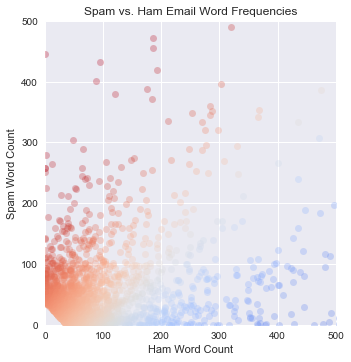

In [125]:
# set up our scatter plot with a diverging color palette to show extreme count differences
sns.set(color_codes=True)
scatter = sns.lmplot(x="ham_counts", y="spam_counts", data=wordCounts, fit_reg=False, scatter_kws={'alpha':0.3},legend=False,palette="coolwarm",hue="spam_count_delta")

# trim down the plot so we can see most of the dataset
plt.xlim(0,500)
plt.ylim(0,500)

scatter.set(xlabel='Ham Word Count', ylabel='Spam Word Count', title='Spam vs. Ham Email Word Frequencies')
plt.show()

Each observation represents a word with its word count for ham emails on the x-axis and spam on the y-axis. In addtion, the datapoints are colored deeper red where there's a stronger difference favoring spam and blue for ham. Lots of observations clustered around a 45 degree line would suggest that word count variations would not be a good feature set for prediction, but luckily this is not the case. We see lots of good word count variations between spam and ham emails.

Great, let's write out word count summaries in case we'll need them later. Saving the vectorization is a little tricky so we'll just redo it in the next step.

In [126]:
# write the cleansed dataframe to a file
wordCounts.to_csv('data/wordCountSums.tab.gz', index=False, compression='gzip', sep='\t')